## Linear Regression with Numpy

This tutorial is taken form this blog https://www.cs.toronto.edu/~frossard/post/linear_regression/

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
#data generation
data_x = np.linspace(1.0, 10.0, 100)[:, np.newaxis]
data_y = np.sin(data_x) + 0.1*np.power(data_x,2) + 0.5*np.random.randn(100,1)
data_x /= np.max(data_x)

Text(0, 0.5, 'y-axis')

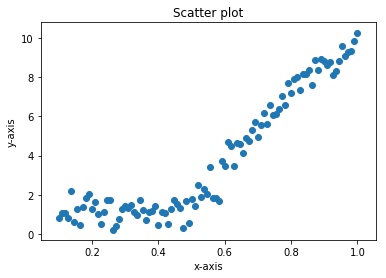

In [17]:
plt.scatter(data_x, data_y)
plt.title('Scatter plot')
plt.xlabel('x-axis')
plt.ylabel('y-axis')


In [18]:
## adding bias term to imput data
data_x = np.hstack([np.ones_like(data_x), data_x])
data_x.shape

(100, 2)

In [195]:
## train test split
def train_test_split(data_x, data_y, test_portion=20):
    order = np.random.permutation(len(data_x))
    ## 
    test_x = data_x[order[:test_portion]]
    test_y = data_y[order[:test_portion]]
    train_x = data_x[order[test_portion:]]
    train_y = data_y[order[test_portion:]]
    return train_x, train_y, test_x, test_y

In [196]:
train_x, train_y, test_x, test_y = train_test_split(data_x, data_y)

In [200]:
#calculate gradients for updating weights
def get_gradient(w, x, y):
    y_estimate = x.dot(w).flatten()
    error = (y.flatten() - y_estimate)
    gradient = -(1.0/len(x)) * error.dot(x)
    return gradient, np.power(error, 2)

In [212]:
def train(train_x, train_y, test_x, test_y, verbose=100):
    w = np.random.randn(len(train_x[0]))
    alpha = 0.5
    tolerance = 1e-5

    # Perform Gradient Descent
    iterations = 1
    plt.scatter(train_x[:, 1], train_y)
    plt.title('Regression plot for Train data')
    plt.xlabel('x-axis')
    plt.ylabel('y-axis')

    while True:
        gradient, error = get_gradient(w, train_x, train_y)
        new_w = w - alpha * gradient

        # Stopping Condition
        if np.sum(abs(new_w - w)) < tolerance:
            print("Converged.")
            plt.plot(train_x[:, 1], train_x.dot(w))
            break

        # Print error every 50 iterations
        if iterations % verbose == 0:
            print("Iteration: %d - Train Error: %.4f, Test Error: %.4f" %(iterations, mean_squared_error(train_x.dot(new_w), train_y), mean_squared_error(test_x.dot(new_w), test_y)))
            plt.plot(train_x[:, 1], train_x.dot(w), linestyle='dashed')

        iterations += 1
        w = new_w
    return w

Iteration: 100 - Train Error: 1.5031, Test Error: 1.6232
Iteration: 200 - Train Error: 1.4694, Test Error: 1.4887
Iteration: 300 - Train Error: 1.4692, Test Error: 1.4809
Iteration: 400 - Train Error: 1.4692, Test Error: 1.4802
Converged.


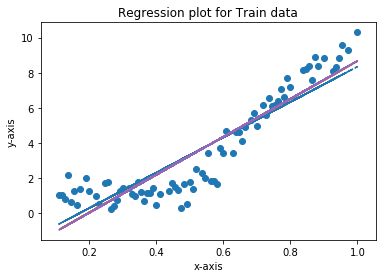

In [213]:
w = train(train_x, train_y, test_x, test_y)

Text(0, 0.5, 'y-axis')

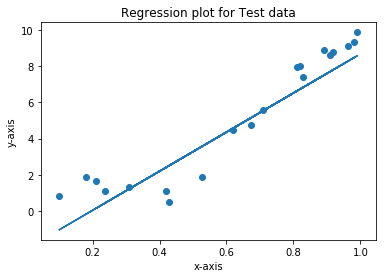

In [203]:
plt.scatter(test_x[:, 1], test_y)
plt.plot(test_x[:, 1], test_x.dot(w))
plt.title('Regression plot for Test data')
plt.xlabel('x-axis')
plt.ylabel('y-axis')


### Adding more features

In [175]:
## adding bias term to imput data
x_square_data = np.hstack([ data_x, np.square(data_x[:, 1])[:, np.newaxis]])
x_square_data.shape

(100, 3)

In [199]:
x_sq_train_x, x_sq_train_y, x_sq_test_x, x_sq_test_y = train_test_split(x_square_data, data_y)

Iteration: 1000 - Train Error: 0.5514, Test Error: 0.8254
Iteration: 2000 - Train Error: 0.5118, Test Error: 0.7199
Iteration: 3000 - Train Error: 0.5050, Test Error: 0.6833
Iteration: 4000 - Train Error: 0.5038, Test Error: 0.6694
Iteration: 5000 - Train Error: 0.5036, Test Error: 0.6638
Iteration: 6000 - Train Error: 0.5036, Test Error: 0.6615
Iteration: 7000 - Train Error: 0.5036, Test Error: 0.6606
Iteration: 8000 - Train Error: 0.5036, Test Error: 0.6602
Converged.


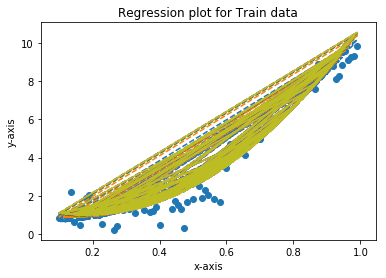

In [211]:
w = train(x_sq_train_x, x_sq_train_y, x_sq_test_x, x_sq_test_y, verbose=1000)

### Over fit the model

In [219]:
x_n_data = data_x
for i in range(2,20):
    x_n_data = np.hstack([ x_n_data, np.power(x_n_data[:, 1], i)[:, np.newaxis]])
x_n_data.shape

(100, 20)

In [220]:
x_n_train_x, x_n_train_y, x_n_test_x, x_n_test_y = train_test_split(x_n_data, data_y)

Iteration: 1000000 - Train Error: 0.2357, Test Error: 0.3055
Iteration: 2000000 - Train Error: 0.2333, Test Error: 0.3007
Iteration: 3000000 - Train Error: 0.2327, Test Error: 0.2993
Iteration: 4000000 - Train Error: 0.2323, Test Error: 0.2980
Iteration: 5000000 - Train Error: 0.2320, Test Error: 0.2968
Iteration: 6000000 - Train Error: 0.2317, Test Error: 0.2956
Iteration: 7000000 - Train Error: 0.2314, Test Error: 0.2946
Iteration: 8000000 - Train Error: 0.2312, Test Error: 0.2936
Iteration: 9000000 - Train Error: 0.2310, Test Error: 0.2927
Iteration: 10000000 - Train Error: 0.2308, Test Error: 0.2919
Iteration: 11000000 - Train Error: 0.2306, Test Error: 0.2912
Iteration: 12000000 - Train Error: 0.2305, Test Error: 0.2905
Iteration: 13000000 - Train Error: 0.2303, Test Error: 0.2899
Iteration: 14000000 - Train Error: 0.2302, Test Error: 0.2893
Iteration: 15000000 - Train Error: 0.2301, Test Error: 0.2888
Iteration: 16000000 - Train Error: 0.2300, Test Error: 0.2883
Iteration: 170000

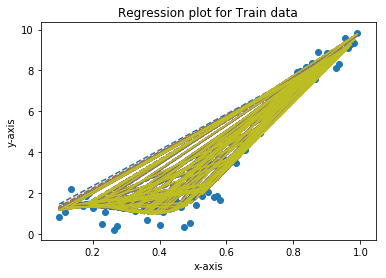

In [221]:
w = train(x_n_train_x, x_n_train_y, x_n_test_x, x_n_test_y, verbose=1000000)

In [222]:
w

array([ -0.48518289,  25.41706409, -98.0626444 ,  84.8063311 ,
        74.88382587,  -1.2105878 , -53.35294035, -56.84445429,
       -30.73333234,   3.0330072 ,  28.98840751,  38.92662634,
        32.43982993,  14.46066038,  -8.77601381, -25.90230727,
       -33.05054291, -27.63747235,  -0.53111432,  43.81160397])

### Gradients checking and calculation

In [162]:
def mean_squared_error(y_pred, y_true):
    squared_error = np.power(y_pred-y_true.flatten(), 2)
    return np.mean(squared_error)

def farword_pass(inputs, weights, y_true):
    y_pred = inputs.dot(weights).flatten()
    return mean_squared_error(y_pred, y_true)

Gradient Checks
In theory, performing a gradient check is as simple as comparing the analytic gradient to the numerical gradient. In practice, the process is much more involved and error prone. Here are some tips, tricks, and issues to watch out for:

Use the centered formula. The formula you may have seen for the finite difference approximation when evaluating the numerical gradient looks as follows:

(bad, do not use)
\begin{equation*}
\frac{df(x)}{dx}= \frac{f(x+h)−f(h)}{h}
\end{equation*}

where h is a very small number, in practice approximately 1e-5 or so. In practice, it turns out that it is much better to use the centered difference formula of the form:

(use instead)
\begin{equation*}
\frac{df(x)}{dx}= \frac{f(x+h)−f(x−h)}{2h}
\end{equation*}

This requires you to evaluate the loss function twice to check every single dimension of the gradient (so it is about 2 times as expensive), but the gradient approximation turns out to be much more precise. To see this, you can use Taylor expansion of f(x+h) and f(x−h) and verify that the first formula has an error on order of O(h), while the second formula only has error terms on order of O(h2) (i.e. it is a second order approximation).



In [100]:
def gradient_check(inputs, weights, y_true, loss_function, h):
    gradient_aprox = np.zeros_like(weights)
    for idx in range(len(weights)):
        new_plus_w = np.copy(weights)
        new_minus_w = np.copy(weights)
        new_plus_w[idx] += h
        new_minus_w[idx] -= h
        f_of_x_plus_h = farword_pass(inputs, new_plus_w, y_true)
        f_of_x_minus_h = farword_pass(inputs, new_minus_w, y_true)
#         print(new_plus_w, new_minus_w)
        print(f_of_x_plus_h, f_of_x_minus_h)
        gradient_aprox[idx] = (f_of_x_plus_h - f_of_x_minus_h)/(2*h)
    
    return gradient_aprox
    

In [101]:
W = np.random.randn(2)

In [109]:
W

array([-1.75971166, -0.45868448])

In [118]:
check = gradient_check(data_x, W, data_y, farword_pass, 1)

3410.3555876644323 5782.389528769918
3874.882251857848 5192.13559184923


In [120]:
grads = gradient(W, data_x, data_y)

(100,)


In [122]:
np.linalg.norm(check - grads[0])/ (np.linalg.norm(check) + np.linalg.norm(grads[0]))

0.989491284801031

In [163]:
new_plus_w = np.array(list(W))
new_plus_w[0] = new_plus_w[0] + 1e-6
new_minus_w = np.array(list(W))
new_minus_w[0] = new_minus_w[0] - 1e-6
print(new_plus_w, new_minus_w)
(farword_pass(data_x, new_plus_w, data_y) - farword_pass(data_x, new_minus_w, data_y))/ (2* 1e-6)

[-1.75971066 -0.45868448] [-1.75971266 -0.45868448]


-11.860169706778834

In [104]:
gradient(W, data_x, data_y)

(100,)


(array([-5.93008485, -4.05029652]),
 array([  6.92775322,   8.23659261,   8.25016028,   7.04091226,
         16.09248562,   5.9702652 ,   9.64603517,   5.30247086,
         10.31294291,  13.65173564,  15.03857297,   9.72766162,
         12.2393591 ,   8.20986779,   5.63005973,   8.83460016,
         12.88973933,  13.18545964,   4.40373586,   5.31000564,
          7.05403355,   9.99472418,  10.95545484,  10.35949212,
         11.30782087,   9.16189952,   8.38696459,  13.49483857,
          9.92769421,   6.89056603,   9.38186059,   9.72606055,
         11.27566093,   5.74150174,   9.26942665,   9.25117233,
          5.99888591,  10.5485783 ,  13.56012893,  12.1319123 ,
         10.87156561,   5.29046938,  13.43127787,   6.35652332,
         14.38924972,  11.5970003 ,  20.31826787,  14.97616699,
         18.51474109,  16.37461705,  29.50169939,  14.69038303,
         15.07116589,  13.6906627 ,  33.03264518,  30.0935    ,
         45.35497307,  42.70273845,  30.26731369,  44.89179061,
    